In [ ]:
# Iris Dataset Analysis

This notebook analyzes the classic Iris dataset, exploring the distribution of species labels and various characteristics of the flowers.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style with pastel colors
plt.style.use('default')
sns.set_palette("pastel")
plt.rcParams['figure.figsize'] = (10, 6)

# Define pastel color schemes
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#D4B3FF']
iris_pastel_colors = ['#FFB3BA', '#BAFFC9', '#BAE1FF']  # Soft pink, mint, sky blue


In [2]:
# Load the Iris dataset
iris = load_iris()

# Create a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()


Dataset shape: (150, 6)

First few rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Basic dataset information
print("Dataset Info:")
print("="*50)
print(f"Total samples: {len(df)}")
print(f"Features: {list(iris.feature_names)}")
print(f"Target classes: {list(iris.target_names)}")
print(f"Missing values: {df.isnull().sum().sum()}")

print("\nDataset Statistics:")
print("="*50)
df.describe()


Dataset Info:
Total samples: 150
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]
Missing values: 0

Dataset Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
## Label Distribution Analysis

Now let's analyze the distribution of species labels in the dataset. As requested, we'll create both a bar plot and a pie chart to visualize the distribution.


In [4]:
# Get the distribution of species
species_counts = df['species_name'].value_counts()
species_percentages = df['species_name'].value_counts(normalize=True) * 100

print("Species Distribution:")
print("="*40)
for species, count in species_counts.items():
    percentage = species_percentages[species]
    print(f"{species.capitalize()}: {count} samples ({percentage:.1f}%)")

print(f"\nTotal samples: {species_counts.sum()}")


Species Distribution:
Setosa: 50 samples (33.3%)
Versicolor: 50 samples (33.3%)
Virginica: 50 samples (33.3%)

Total samples: 150


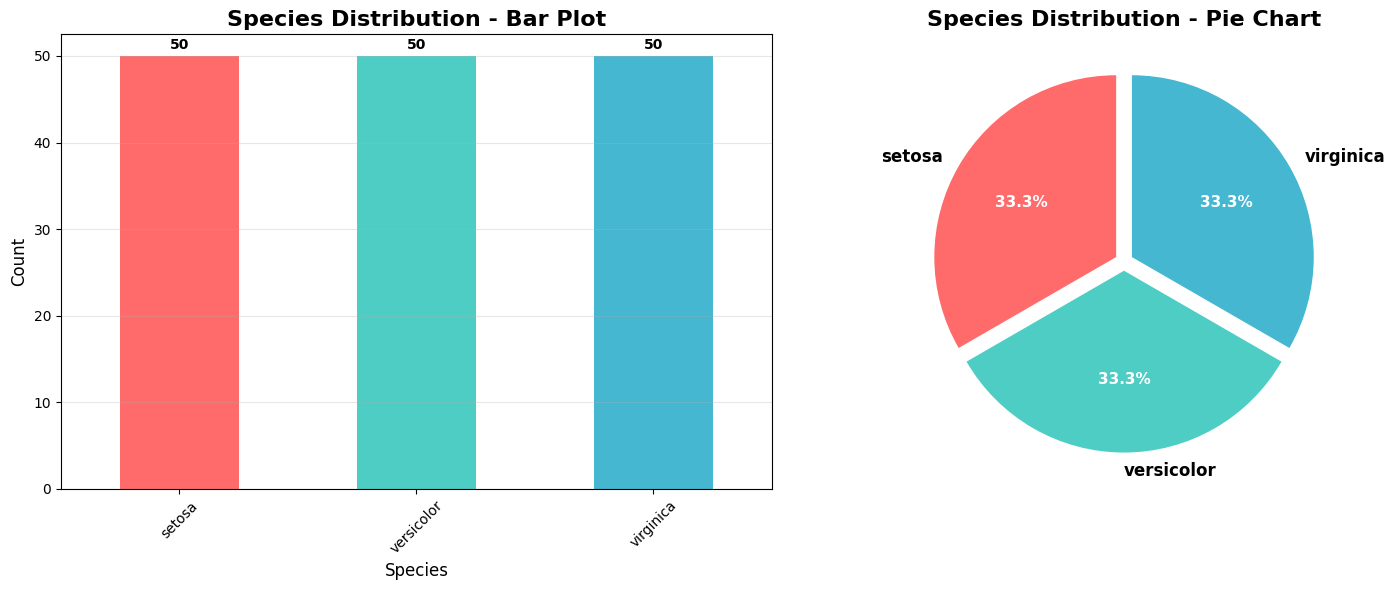

In [5]:
# Create both bar plot and pie chart for label distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot with pastel colors
species_counts.plot(kind='bar', ax=ax1, color=iris_pastel_colors)
ax1.set_title('Species Distribution - Bar Plot', fontsize=16, fontweight='bold')
ax1.set_xlabel('Species', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(species_counts.values):
    ax1.text(i, v + 0.5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart with pastel colors
wedges, texts, autotexts = ax2.pie(species_counts.values, 
                                   labels=species_counts.index, 
                                   autopct='%1.1f%%',
                                   colors=iris_pastel_colors,
                                   startangle=90,
                                   explode=(0.05, 0.05, 0.05))

ax2.set_title('Species Distribution - Pie Chart', fontsize=16, fontweight='bold')

# Enhance pie chart text
for autotext in autotexts:
    autotext.set_color('black')  # Changed to black for better contrast on pastel
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


In [ ]:
## Additional Analysis

Let's explore some additional characteristics of the dataset to better understand the differences between species.


In [ ]:
# Feature distributions by species with pastel colors
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    
    # Create histogram for each species with pastel colors
    for j, species in enumerate(df['species_name'].unique()):
        species_data = df[df['species_name'] == species][feature]
        axes[row, col].hist(species_data, alpha=0.8, label=species.capitalize(), 
                           bins=15, color=iris_pastel_colors[j])
    
    axes[row, col].set_title(f'Distribution of {feature.title()}', fontweight='bold')
    axes[row, col].set_xlabel(feature.title())
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()
    axes[row, col].grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Create a correlation heatmap with pastel colors
plt.figure(figsize=(10, 8))
correlation_matrix = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()

# Use a pastel colormap for the heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8},
            linewidths=0.5,
            linecolor='white')

plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
# Scatter plot matrix to visualize relationships between features with pastel colors
from pandas.plotting import scatter_matrix

fig, ax = plt.subplots(figsize=(15, 15))
# Map species to pastel colors
pastel_color_map = {0: iris_pastel_colors[0], 1: iris_pastel_colors[1], 2: iris_pastel_colors[2]}
scatter_matrix(df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'species_name']], 
               c=df['species'].map(pastel_color_map),
               alpha=0.8,
               figsize=(15, 15),
               diagonal='hist')

plt.suptitle('Scatter Plot Matrix - Iris Dataset Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [ ]:
## Summary

This analysis of the Iris dataset reveals several key insights:

### Label Distribution
- **Perfect Balance**: The dataset contains exactly 50 samples of each species (Setosa, Versicolor, and Virginica)
- **Equal Representation**: Each species represents 33.3% of the total dataset
- This balanced distribution makes it an excellent dataset for machine learning classification tasks

### Key Findings
1. **Dataset Characteristics**: 150 total samples, 4 features, 3 classes, no missing values
2. **Feature Correlations**: Strong positive correlation between petal length and petal width
3. **Species Separation**: Different species show distinct patterns in their feature distributions
4. **Data Quality**: Clean, well-structured dataset ideal for analysis and modeling

The visualizations clearly show both the balanced nature of the dataset and the distinctive characteristics that separate the three iris species.
